# Question 1: Linear Models with Materials Data
**1.1 Loading and examing our data**

You are provided with a dataset containing fictional materials science-related data. The data is in the HW1 folder named `AutoAM_dataset.csv` The dataset includes features such as temperature, pressure, and composition, and the target variable is a property of interest (e.g., conductivity).

a) Load the dataset and explore its structure. Heads up though! I poisoned the dataset a with things like outliers, missing cells, duplicate entries, nonsense values etc. Identify problematic data. 

I suggest using both descriptive statistics as well as some plotting to visualize the data. If you are really feeling brave you could check out and use the amazing `ydata-profiling` package (https://docs.profiling.ydata.ai/latest/). 

In [146]:
#Read in the file

df = pd.read_csv("AutoAM_dataset.csv")

#rename fields for easier use
df = df.rename(columns= {'Prime Delay':'primeDelay','Print Speed':'printSpeed','X Offset Correction':'xCor','Y Offset Correction':'yCor','Score':'score'})



In [147]:
df

,primeDelay,printSpeed,xCor,yCor,score
0,0.0,1.000000,0.000000,0.000000,0.339554
1,2.5,3.000000,0.100000,NaN,0.000000
2,5.0,5.000000,-0.100000,-0.100000,0.218576
3,0.0,0.999931,0.000006,0.000025,0.368919
4,0.0,5.070133,0.225151,1.000000,0.000000
...,...,...,...,...,...
97,0.0,1.585934,-0.337143,-0.372811,0.922120
98,0.0,1.568030,-0.335316,-0.365804,0.901296
99,0.0,3.410189,-0.182025,-0.226603,0.595148
100,0.0,1.558826,-0.349834,-0.328645,0.936549


In [148]:
#OPTIONAL your ydata-profiling code goes here
#Generate the ProfileReport using ydata_profiling


profile = ProfileReport(df,title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

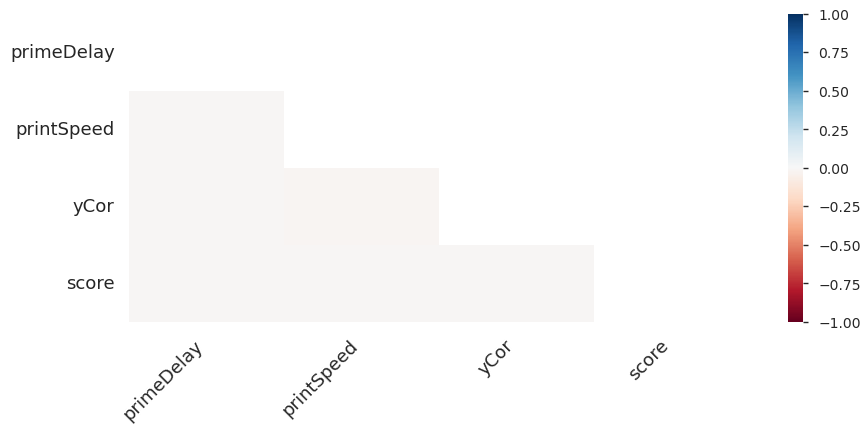

In [149]:
#show the profile report
profile

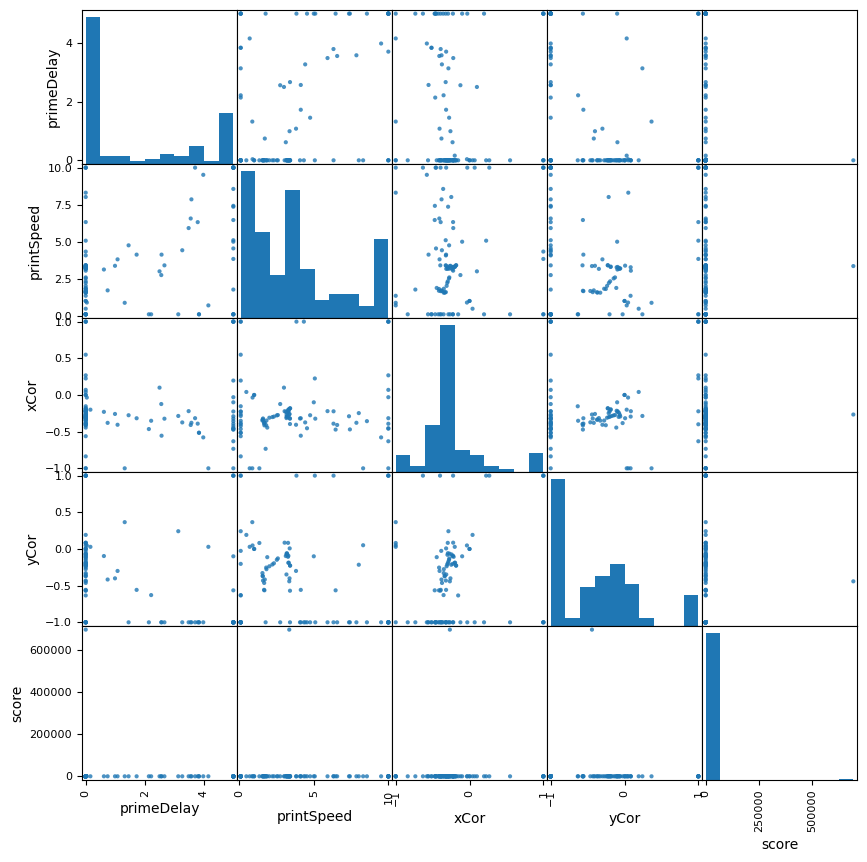

In [150]:


# Select only numerical columns for the scatter matrix
numerical_columns = df.select_dtypes(include='number')
# Generate the scatter matrix
scatter_matrix(numerical_columns, alpha=0.8, figsize=(10, 10), diagonal='hist')
# Show the plot
plt.show()

In [151]:
#Upon investigation, the df score field contains a value that seems to be missing the decimal point
df_orig = df  #make a copy of the original df so I can modify the df without changing my original

print(df['score'].max())

696129.0


In [152]:
df['score'] = df['score'].replace(696129,0.696129)


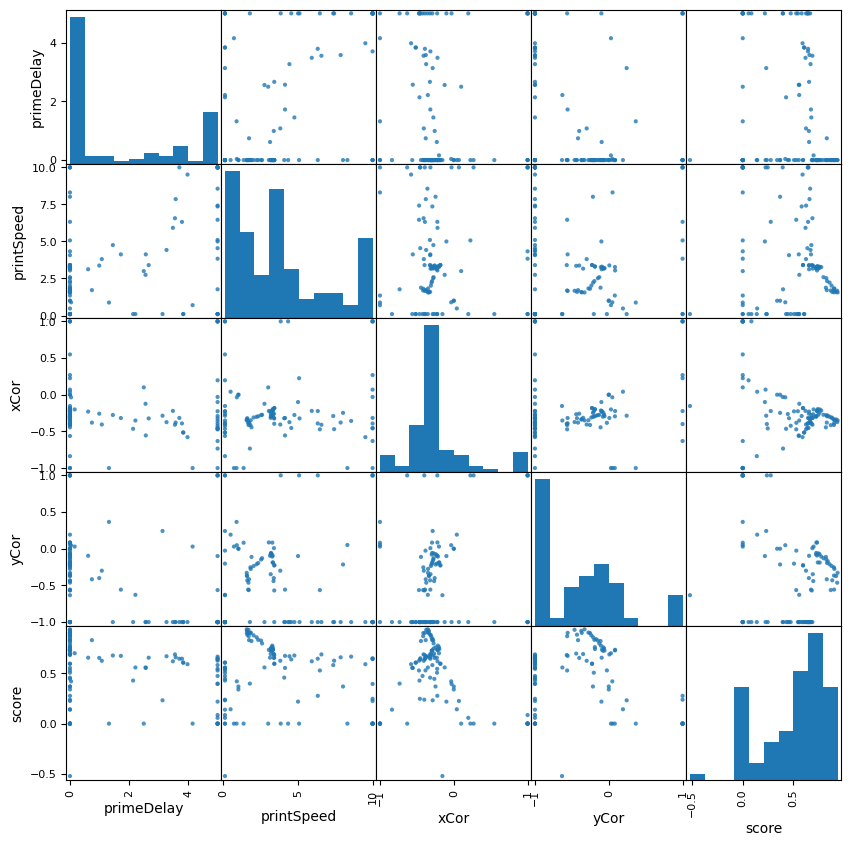

In [153]:
#Print the scatter matrix again

# Select only numerical columns for the scatter matrix
numerical_columns = df.select_dtypes(include='number')
# Generate the scatter matrix
scatter_matrix(numerical_columns, alpha=0.8, figsize=(10, 10), diagonal='hist')
# Show the plot
plt.show()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

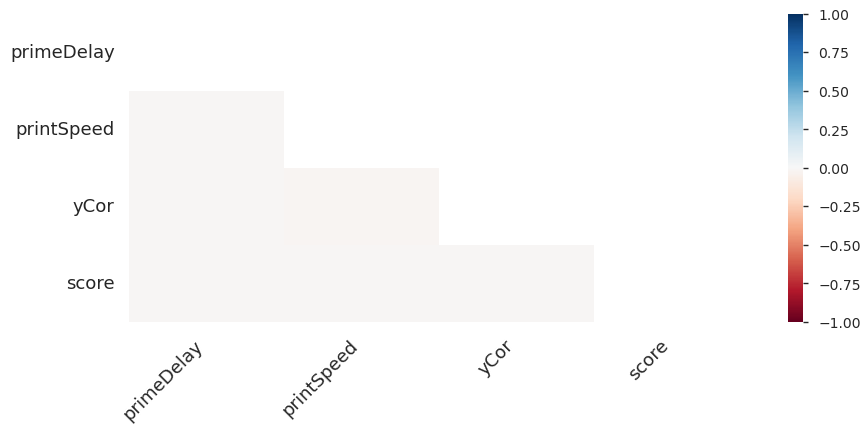

In [154]:
#run the data profiler again


profile = ProfileReport(df,title="Profiling Report")
profile

In [155]:
#Check for outliers

colName = 'score'
colData = df[colName]
Q1 = 0.246653
Q3 = 0.727446
IQR = 0.480793

lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
outliers = (colData < lowerBound) | (colData > upperBound)

#df_with_outliers = df.copy()
#df_with_outliers['Outlier'] = outliers
#print(df_with_outliers)

df_outliers_only = df[outliers]
print(df_outliers_only)



    primeDelay  printSpeed      xCor      yCor     score
14         0.0         0.1 -0.153953 -0.633831 -0.521209


In [156]:
#profile shows two duplicate rows
#show the dluplicates

# Identify all occurrences of duplicate rows
duplicate_mask = df.duplicated(keep=False)

# Filter the DataFrame to show only duplicate rows
duplicate_rows = df[duplicate_mask]

# Get the indices of duplicate rows
duplicate_indices = df[duplicate_mask].index

# Display all occurrences of duplicate rows along with their location
print("Duplicate Rows and their Location in the df:")
for index, row in zip(duplicate_indices, duplicate_rows.itertuples(index=False)):
    print(f"Index {index}: {row}")


Duplicate Rows and their Location in the df:
Index 21: Pandas(primeDelay=3.836204454, printSpeed=0.1, xCor=-0.515315555, yCor=-1.0, score=0.606331)
Index 59: Pandas(primeDelay=3.836204454, printSpeed=0.1, xCor=-0.515315555, yCor=-1.0, score=0.606331)
Index 79: Pandas(primeDelay=0.0, printSpeed=3.410189478, xCor=-0.182024517, yCor=-0.226603174, score=0.595148)
Index 99: Pandas(primeDelay=0.0, printSpeed=3.410189478, xCor=-0.182024517, yCor=-0.226603174, score=0.595148)


In [157]:
#While it is unlikely that two records would begenerated with identical data for all columns, it is not impossible
#However, because it was stated at the start of the assignment that the data was poisoned with duplicate entries it is likley that the duplicates should be removed
#Will evaluate with and without the duplicate values
df_noDupes = df.drop_duplicates()
df_noDupes

#df_copy = df
#df = df_noDupes

#df_noDupes

,primeDelay,printSpeed,xCor,yCor,score
0,0.000000,1.000000,0.000000,0.000000,0.339554
1,2.500000,3.000000,0.100000,NaN,0.000000
2,5.000000,5.000000,-0.100000,-0.100000,0.218576
3,0.000000,0.999931,0.000006,0.000025,0.368919
4,0.000000,5.070133,0.225151,1.000000,0.000000
...,...,...,...,...,...
96,0.742365,1.714610,-0.380317,-0.416497,0.829756
97,0.000000,1.585934,-0.337143,-0.372811,0.922120
98,0.000000,1.568030,-0.335316,-0.365804,0.901296
100,0.000000,1.558826,-0.349834,-0.328645,0.936549


b) Deal with the identified problematic data and deal with them however you see fit. Once you have done so, plot the data. The data set has 4 features and a score. Use scatter plots where you encode information as x, y, and color. Plot histograms or violin plots of some of the features.

In [158]:
#initially will fill all NaN values with the mean.  Will then try other values as well as discarding to evaluate the model fit
#whatever this code block ends up assigning as the final df variable will be used in subsequent blocks for the model fit

#replace nan with mean
df = df.fillna(df.mean())



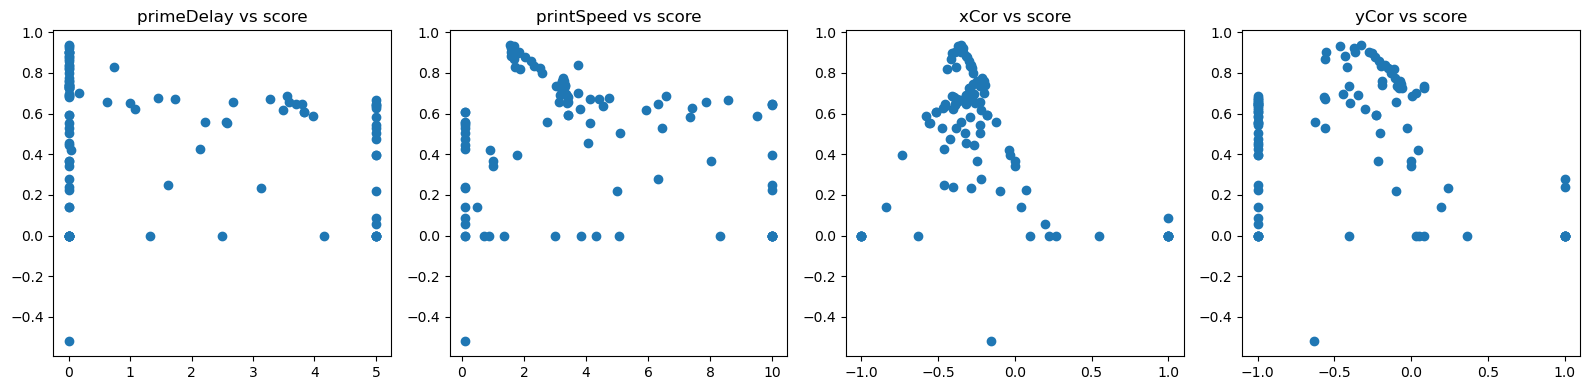

In [159]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
featureNames = df.columns

for i in range(4):
    ax[i].scatter(df[featureNames[i]],y)
    ax[i].set_title(f'{featureNames[i]} vs score')

plt.tight_layout()
plt.show()

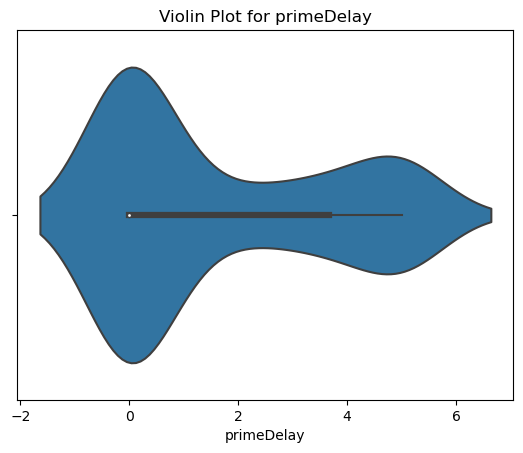

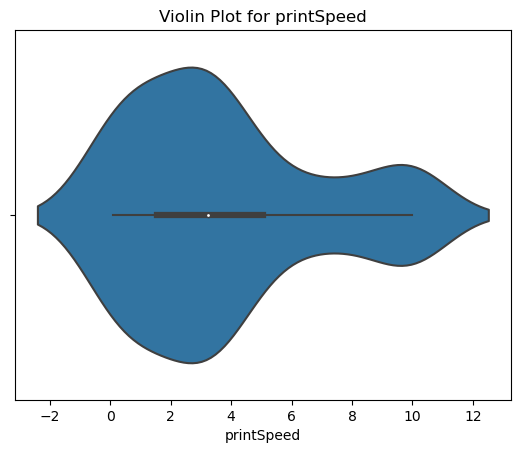

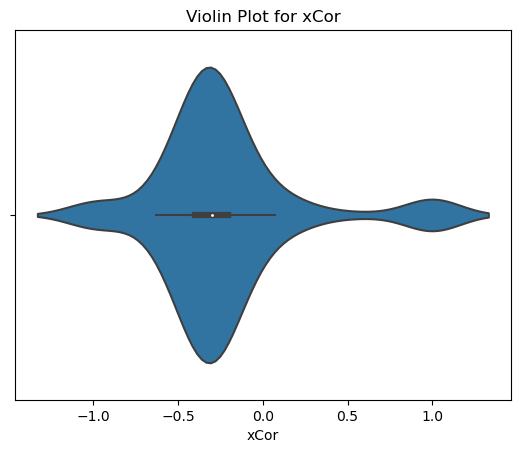

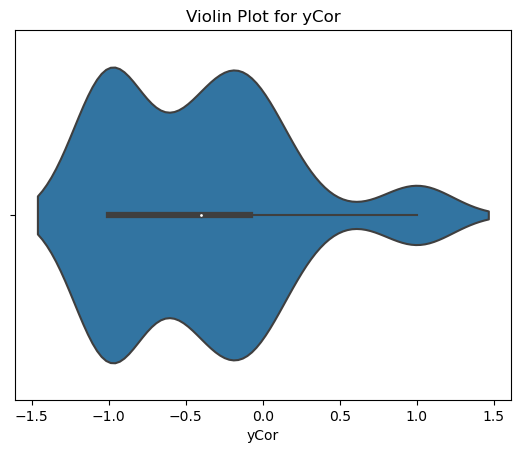

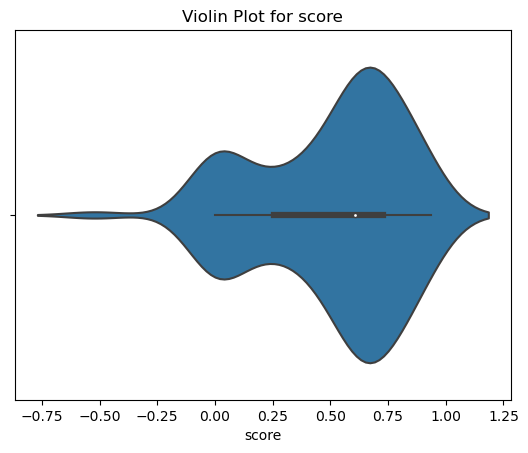

In [160]:


for column in df.columns:
    sns.violinplot(x=column,data=df)
    plt.title(f'Violin Plot for {column}')
    plt.show()

b) Split the dataset into training and testing sets (80% training, 20% testing).



C:\Users\bmill\AppData\Local\Temp\ipykernel_19968\1297644494.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[transFeat + '_squared'] = X[transFeat] **2


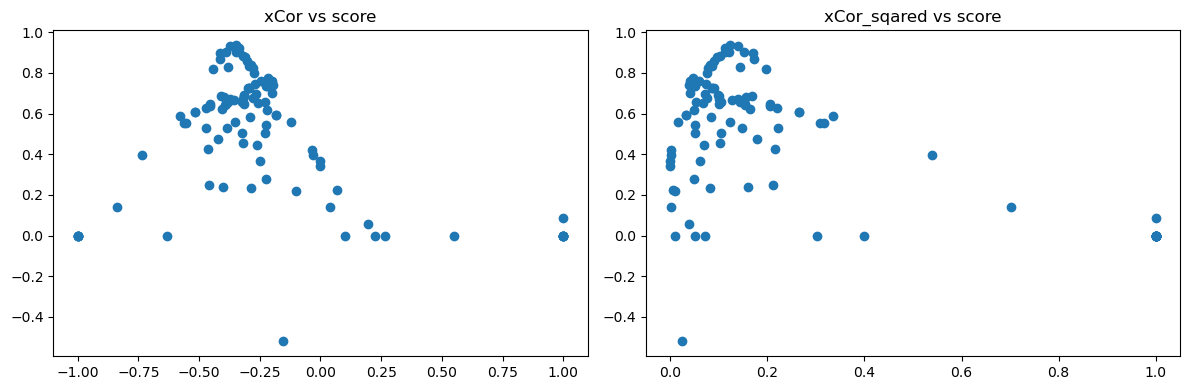

In [161]:


#df['primeDelay']
#df['printSpeed']
#df['xCor']
#df['yCor']
#df['score']


#Initially ran the fit with all features even though the visualization above indicated that not all were significant 
#After that initial fit, the p-value for printSpeed was 0.5 indicating it is not significant
#Removed it from the fit
#X = df[['primeDelay','printSpeed','xCor','yCor']]
X = df[['xCor','yCor']]
y  = df['score']


#transform my feature
transFeat = 'xCor'
X[transFeat + '_squared'] = X[transFeat] **2

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(X[transFeat],y)
ax[0].set_title(f'{transFeat} vs score')

ax[1].scatter(X[transFeat+'_squared'],y)
ax[1].set_title(f'{transFeat}_sqared vs score')

plt.tight_layout()
plt.show()




In [162]:
dfTrain, dfTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the shapes of the resulting DataFrames
print("Training DataFrame (dfTrain) shape:", dfTrain.shape)
print("Test DataFrame (dfTest) shape:", dfTest.shape)

Training DataFrame (dfTrain) shape: (81, 3)
Test DataFrame (dfTest) shape: (21, 3)


**1.2 Linear Model Construction and Validation**

Build a linear regression model using the statsmodels package.

a) Train the linear model on the training set.

In [163]:


#X_train = dfTrain[['primeDelay','printSpeed','xCor','yCor']]
#y_train  = dfTrain['score']

X_train = sm.add_constant(dfTrain)

model = sm.OLS(yTrain,X_train)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     15.66
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           4.82e-08
Time:                        16:19:44   Log-Likelihood:                -1.3325
No. Observations:                  81   AIC:                             10.67
Df Residuals:                      77   BIC:                             20.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5588      0.046     12.229   

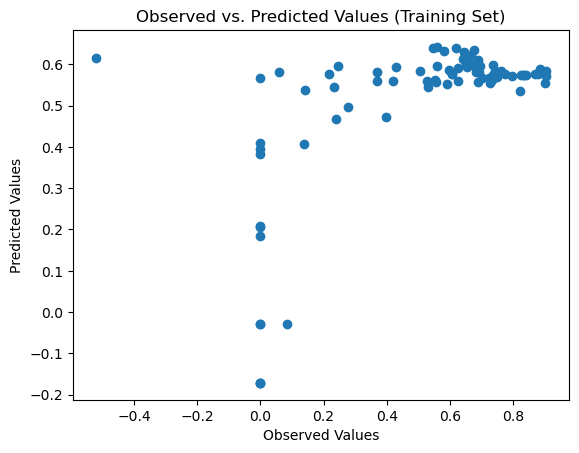

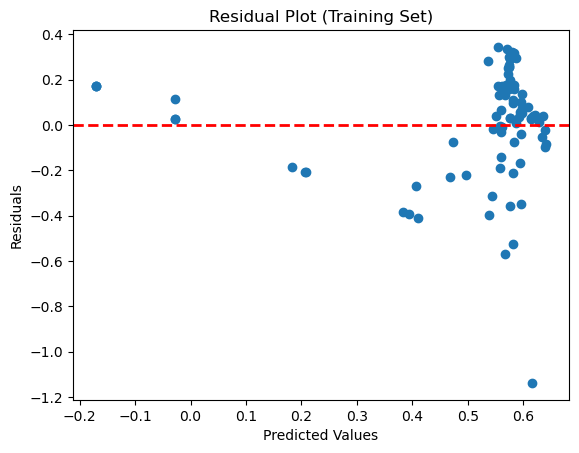

In [164]:
# Predict the target variable on the training set
y_pred_train = results.predict(X_train)

# Scatter plot of observed vs. predicted values
plt.scatter(yTrain, y_pred_train)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values (Training Set)')
plt.show()

# Residual plot
residuals = yTrain - y_pred_train
plt.scatter(y_pred_train, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Set)')
plt.show()

b) Validate the model on the testing set and calculate relevant evaluation metrics.



In [165]:
#your code goes here

c) Interpret the model coefficients and assess the model's performance.



**<span style="color:teal">put your discussion here</span>**
